In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import statistics

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/state.csv')

In [ ]:
df.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [ ]:
#1. Compute mean, trimmed mean and median 
meancal = df['Population'].mean()
trimmed_mean_cal =  stats.trim_mean(df['Population'],0.1)
median1 = statistics.median(df['Population'])

print("Mean : ",meancal)
print("Trimmed Mean Call :",trimmed_mean_cal)
print("median cal :",median1)

Mean :  6162876.3
Trimmed Mean Call : 4783697.125
median cal : 4436369.5


The mean is bigger than the trimmed mean, which is bigger than the median.
This is because the trimmed mean excludes the largest and smallest five states
(trim=0.1 drops 10% from each end). If we want to compute the average murder rate
for the country, we need to use a weighted mean or median to account for different
populations in the states.

Weighted mean is available with NumPy. For weighted median, we can use the specialized
package wquantiles:

In [ ]:
weighted_mean  = np.average(df['Murder.Rate'], weights=df['Population'])
weighted_median = wquantiles.median(df['Murder.Rate'],weights = df['Population'])

print("Weighted Mean :",weighted_mean)
print("weighted_median :",weighted_median)

Weighted Mean : 4.445833981123393
weighted_median : 4.4


## Estimates of Variability
Location is just one dimension in summarizing a feature. A second dimension, variability, also referred to as dispersion, measures whether the data values are tightly clustered or spread out. At the heart of statistics lies variability: measuring it, reducing it, distinguishing random from real variability, identifying the various sources of real variability, and making decisions in the presence of it.

In [ ]:
import statsmodels
stdval = df['Population'].std()
iqr = df["Population"].quantile(0.75) -  df["Population"].quantile(0.25)
#mad = statsmodels.robust.scale.mad(df['Population'])
print("Standard Deviation :",stdval)
print("Interquartile range :", iqr)
#print("Median Absolute Deviation :".mad)

Standard Deviation : 6848235.347401142
Interquartile range : 4847308.0


## Estimates based on Percentiles

A different approach to estimating dispersion is based on looking at the spread of the sorted data.
Statistics based on sorted (ranked) data are referred to as order statistics.
The most basic measure is the range: the difference between the largest and smallest numbers. The minimum and maximum values themselves are useful to know and are helpful in identifying outliers, but the range is extremely sensitive to outliers and not very useful as a general measure of dispersion in the data.

To avoid the sensitivity to outliers, we can look at the range of the data after dropping values from each end.


In a data set, the $P$th percentile is a value such that at least $P$ percent
of the values take on this value or less and at least $(100 – P)$ percent of the values take on this value or more.

For example, to find the 80th percentile, sort the data.
Then, starting with the smallest value, proceed 80 percent of the way to the largest
value. Note that the median is the same thing as the 50th percentile. The percentile is essentially the same as a quantile, with quantiles indexed by fractions (so the $.8$ quantile is the same as the $80$th percentile).

A common measurement of variability is the difference between the $25$th percentile
and the $75$th percentile, called the **interquartile range (or IQR)**. Here is a simple example:
${3,1,5,3,6,7,2,9}$. We sort these to get ${1,2,3,3,5,6,7,9}$. The 25th percentile is at $2.5$,
and the $75$th percentile is at $6.5$, so the interquartile range is $6.5 – 2.5 = 4.$

## Percentiles and Boxplots 

It is common to report the quartiles $(25th, 50th, and 75th$ percentiles)
and the deciles (the $10th, 20th, …, 90th$ percentiles).

Percentiles are especially valuable for summarizing the tails (the outer range) of the distribution. Popular culture has coined the term one-percenters to refer to the people in the top $99$th percentile of wealth.

In [ ]:
df['Murder.Rate'].quantile([0.05,0.25,0.5,0.75,0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

In [ ]:
"""The median is 4 murders per 100,000 people, although there is quite a bit of variability:
the 5th percentile is only 1.6 and the 95th percentile is 6.51."""

Text(0, 0.5, 'Population(millions')

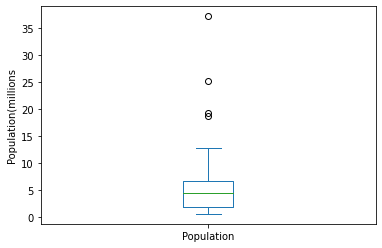

In [ ]:
ax = (df['Population']/1000000).plot.box()
ax.set_ylabel('Population(millions')

From this boxplot we can immediately see that the median state population is about $5$ million, half the states fall between about $2$ million and about $7$ million, and there are some high population outliers. 

The top and bottom of the box are the $75$th and $25$th
percentiles, respectively. The median is shown by the horizontal line in the box. 

The dashed lines, referred to as whiskers, extend from the top and bottom of the box to indicate the range for the bulk of the data.

### Frquency Tables and Histograms 

A frequency table of a variable divides up the variable range into equally spaced segments and tells us how many values fall within each segment

In [ ]:
binnedpopulation = pd.cut(df['Population'],10)
binnedpopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

In [ ]:
from pandas.io.formats.info import DataFrameInfo
arr = np.array([[526935.67, 4232659.0],   
                [4232659.0, 7901692.0],   
                [7901692.0, 11570725.0],      
                [11570725.0, 15239758.0],     
                [15239758.0, 18908791.0],    
                [18908791.0, 22577824.0],    
                [22577824.0, 26246857.0],     
                [33584923.0, 37253956.0],     
                [26246857.0, 29915890.0],     
                [29915890.0, 33584923.0]])
# Just to check that every bin in the histogram, has the same 
#range.
diff = arr[:,1] - arr[:,0]
print(diff)

[3705723.33 3669033.   3669033.   3669033.   3669033.   3669033.
 3669033.   3669033.   3669033.   3669033.  ]


Text(0.5, 0, 'Population(millions')

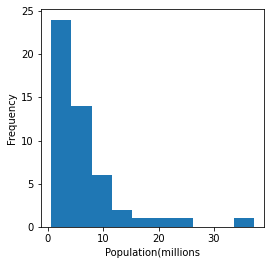

In [ ]:
ax = (df['Population']/1000000).plot.hist(figsize=(4,4))
ax.set_xlabel('Population(millions')

Text(0.5, 0, 'Murder Rate (per 100,000)')

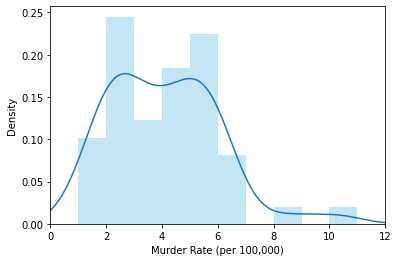

In [ ]:
ax = df['Murder.Rate'].plot.hist(density=True, xlim=[0,12], bins=range(1,12),alpha=0.5,color='skyblue')
df['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

Text(0.5, 0, 'Murder Rate (per 100,000)')

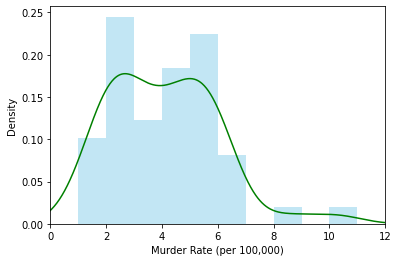

In [ ]:
plt.hist(df['Murder.Rate'],density=True,range=(0,12), bins=range(1,12),alpha=0.5,color='skyblue')
df['Murder.Rate'].plot.density(color='green')
plt.xlim(0, 12)
plt.xlabel('Murder Rate (per 100,000)')

A key distinction from the histogram plotted in Figure 1-3 is the scale of the y-axis: a density plot corresponds to plotting the histogram as a proportion rather than counts.

## Exploring Binary or Categorical Data

In [ ]:
import random
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import seaborn as sns
import random
import matplotlib.pyplot as plt


%cd /content/drive/My\ Drive/colab_notebooks/machine_learning/Interview_prep/Statistics4DataScientist/
df = pd.read_csv("sp500_data.csv.gz")

/content/drive/My Drive/colab_notebooks/machine_learning/Interview_prep/Statistics4DataScientist


In [ ]:
df.head()


,Unnamed: 0,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
0,1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1,1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
2,1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
3,1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
4,1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/sp500_sectors.csv')

In [ ]:
df

,sector,sector_label,sub_sector,symbol
0,information_technology,Technology,data_processing_&_outsourced_services,ADS
1,information_technology,Technology,systems_software,CA
2,information_technology,Technology,systems_software,MSFT
3,information_technology,Technology,systems_software,RHT
4,information_technology,Technology,it_consulting_&_services,CTSH
...,...,...,...,...
512,health_care,Health Care,biotechnology,CELG
513,health_care,Health Care,biotechnology,GILD
514,health_care,Health Care,biotechnology,REGN
515,health_care,Health Care,biotechnology,VRTX
